<a href="https://colab.research.google.com/github/arunnagaraju/ML/blob/master/titanic_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sex
0    30.726645
1    27.915709
Name: Age, dtype: float64
sex
0    30.272732
1    30.272362
Name: Age, dtype: float64
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  27.915708812260537
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  27.915708812260537
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  27.915708812260537
setting mean age -  nan  to  27.915708812260537
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  27.915708812260537
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  30.72664459161148
setting mean age -  nan  to  

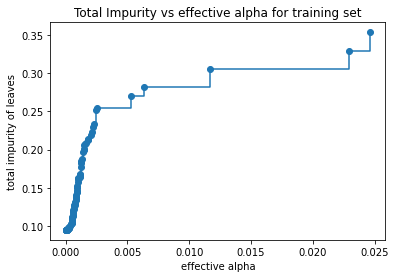

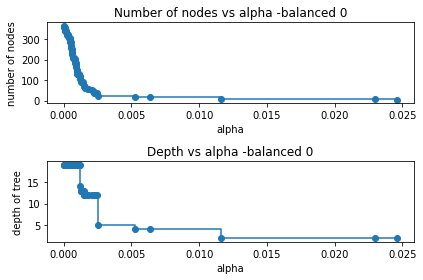

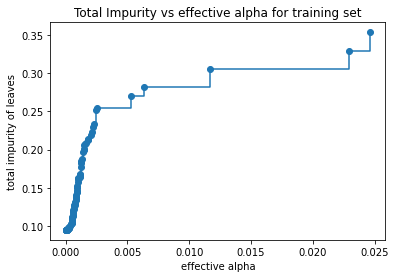

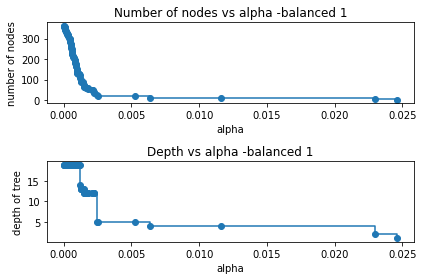

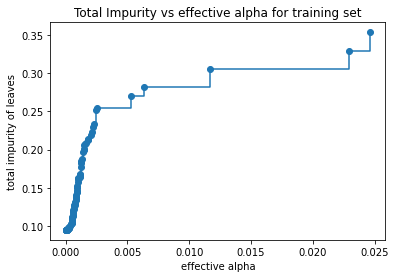

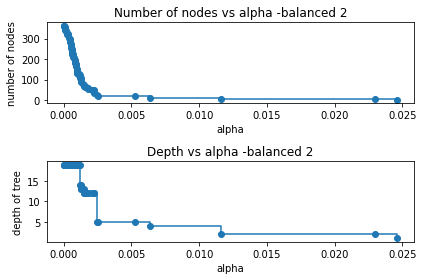

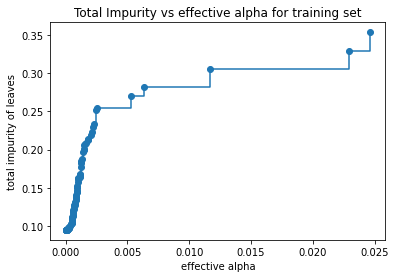

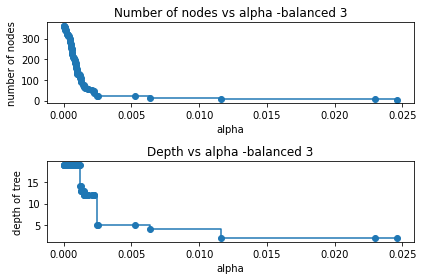

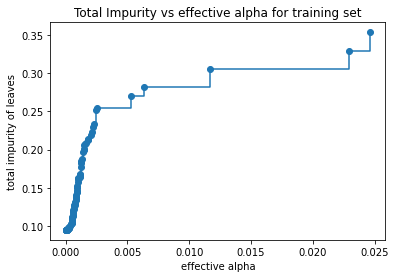

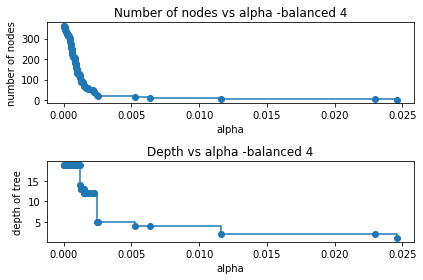

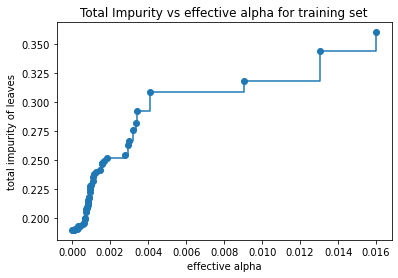

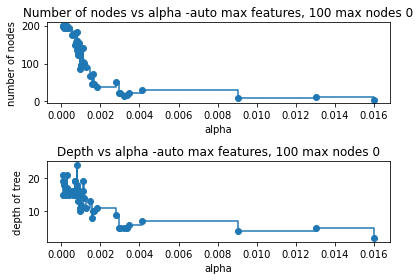

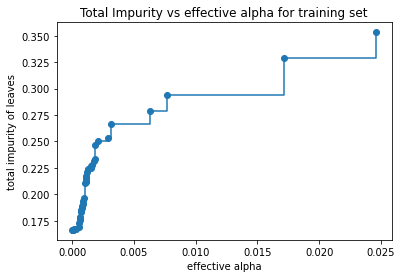

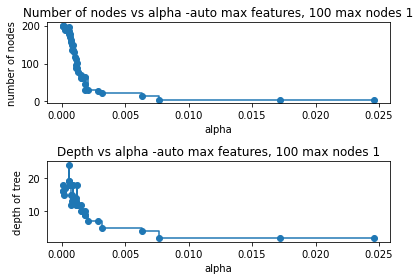

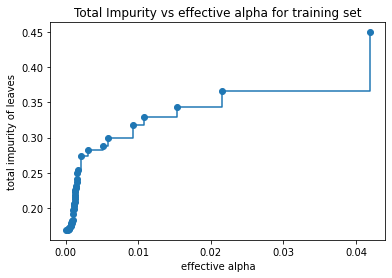

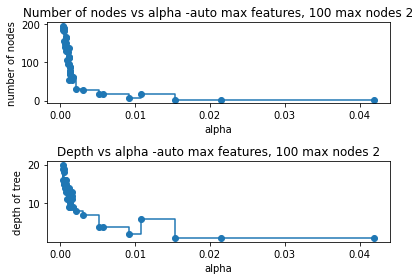

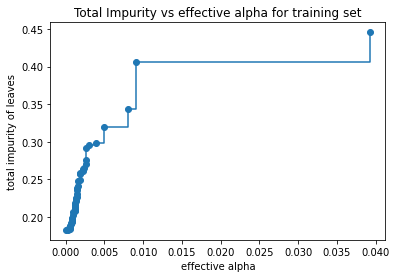

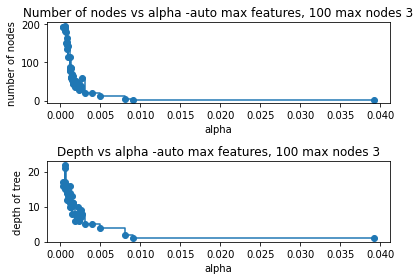

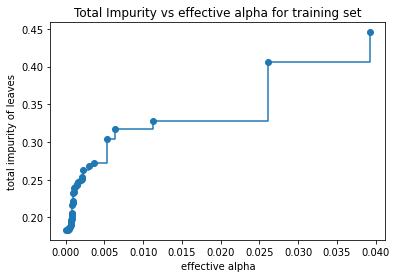

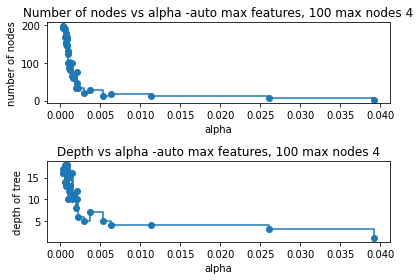

In [78]:
import pandas as pd

import time
from sklearn import tree
import pydot
import matplotlib.pyplot as plt
import math as math
import numpy as np 

train = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")


def embarked(val): 
    if val=='C': 
        return 1
    elif val=='S':
        return 2
    elif val=='Q':
        return 3
    else: 
        return 0

def cabin(val):
  cabinval = 0
  if type(val)==str:
      floor = val[0]
      res = [int(i) for i in val[1:].split() if i.isdigit()] 
      loc = 0
      if len(res) > 0:
         loc = int(res[0])
      cabinval = ord(floor)
      cabinval=cabinval*1000
      cabinval = cabinval + loc
  return cabinval

def getage(i):
  if (not math.isnan(i['Age'])):
    return i['Age']
  print("setting mean age - ", i['Age'], " to ",agemean[(i['sex'])])
  return agemean[(i['sex'])]

def gettestage(i):
  if (not math.isnan(i['Age'])):
    return i['Age']
  print("setting mean age - ", i['Age'], " to ",testagemean[(i['sex'])])
  return testagemean[(i['sex'])]
  
#chainging strings to numerical value

result = test[['Name','PassengerId']]

train['sex'] = train["Sex"].apply(lambda x: 0 if x == "male" else 1)
test['sex'] = test["Sex"].apply(lambda x: 0 if x == "male" else 1)

train['embarked'] = train['Embarked'].apply(embarked)
test['embarked'] = test['Embarked'].apply(embarked)

train['cabin'] = train['Cabin'].apply(cabin)
test['cabin'] = test['Cabin'].apply(cabin)


#Age is an important factor but unfortuantely, the dataset contains empty values for age
#So we will fill it up with average age of the passengers. 

#average = train.mean(skipna=True, numeric_only=True, axis=0)
#average_age = average['Age'];
#train['age'] = train['Age'].apply(lambda x: x if ((type(x)== float or type(x)== int) and not math.isnan(x)) else average_age)
#test['age'] = test['Age'].apply(lambda x: x if ((type(x)== float or type(x)== int) and not math.isnan(x)) else average_age)

#instead of just finding average age, we will try to find average in sex hoping the result
# will be better than just plain average

agedata = train[['Age','sex']]
testagedata = test[['Age','sex']]

agedata.append(testagedata)
agemean = agedata.groupby(['sex'])
agemean = agemean['Age'].agg(np.mean)
print(agemean)
agemean = agemean.to_dict()

testagemean = testagedata.groupby(['sex'])
testagemean = testagemean['Age'].agg(np.mean)
print(testagemean)
testagemean = testagemean.to_dict()

#conclusion - it did not make any difference than average age
#there must be some other factor that contributes to the result

train['age'] = agedata.apply(getage,axis=1,)
test['age'] = testagedata.apply(getage,axis=1)

#dropping unwanted columns
train = train.drop(['Embarked','Cabin','Ticket','Sex','Name','PassengerId','Age','Fare','embarked'],axis=1)
test = test.drop(['Embarked','Cabin','Ticket','Sex','Name','PassengerId','Age','Fare','embarked'],axis=1)

#train = train.dropna()

x_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values
x_test = test.iloc[:,:].values

#clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=4, class_weight="balanced");
#clf = tree.DecisionTreeClassifier(min_samples_split=4, max_features="auto", max_leaf_nodes=20);

print (train)
print (test)

def plot(clf, name):
  clf = clf.fit(x_train, y_train)
  path = clf.cost_complexity_pruning_path(x_train, y_train)
  ccp_alphas, impurities = path.ccp_alphas, path.impurities

  fig, ax = plt.subplots()
  ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
  ax.set_xlabel("effective alpha")
  ax.set_ylabel("total impurity of leaves")
  ax.set_title("Total Impurity vs effective alpha for training set")
  #plt.show()
  
  ccp_alphas = [x for x in ccp_alphas if x > 0.0]
  print(ccp_alphas)
  clfs = []
  node_counts = []
  depth = []
  for ccp_alpha in ccp_alphas:
      if ccp_alpha > 0.0:
        params = {"ccp_alpha":ccp_alpha}
        c = clf.set_params(**params)
        c.fit(x_train, y_train)
        clfs.append(c)
        node_counts.append(c.tree_.node_count)
        depth.append(c.tree_.max_depth)

  node_counts = node_counts[:-1]
  depth = depth[:-1]
  ccp_alphas = ccp_alphas[:-1]

  fig, ax = plt.subplots(2, 1)
  ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
  ax[0].set_xlabel("alpha")
  ax[0].set_ylabel("number of nodes")
  ax[0].set_title("Number of nodes vs alpha -"+name)
  ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
  ax[1].set_xlabel("alpha")
  ax[1].set_ylabel("depth of tree")
  ax[1].set_title("Depth vs alpha -"+ name)
  fig.tight_layout()

for i in range(0,5):
  clf = tree.DecisionTreeClassifier(class_weight="balanced");
  plot(clf,"balanced "+str(i))

for i in range(0,5):
  clf = tree.DecisionTreeClassifier(max_features="auto", class_weight="balanced",max_leaf_nodes=100);
  plot(clf, "auto max features, 100 max nodes "+str(i))

#test_scores = [clf.score(x_test, y_test) for clf in clfs]

clfs = []
y_predicts = pd.DataFrame()
for i in range(0,5):
  clf = tree.DecisionTreeClassifier(ccp_alpha=0.003, class_weight="balanced")
  clf.fit(x_train, y_train)
  clfs.append(clf)
  y_predicts[str(i)] = clf.predict(x_test);

for i in range(5,5):
  clf = tree.DecisionTreeClassifier(max_leaf_nodes=100)
  clf.fit(x_train, y_train)
  clfs.append(clf)
  y_predicts[str(i)] = clf.predict(x_test);

for i in range(10,5):
  clf = tree.DecisionTreeClassifier(class_weight="balanced",max_depth=15)
  clf.fit(x_train, y_train)
  clfs.append(clf)
  y_predicts[str(i)] = clf.predict(x_test);

for i in range(15,5):
  clf = tree.DecisionTreeClassifier(class_weight="balanced",min_samples_leaf=5)
  clf.fit(x_train, y_train)
  clfs.append(clf)
  y_predicts[str(i)] = clf.predict(x_test);

print(y_predicts)
y_predict = y_predicts.mean(axis=1)

y_predict = y_predict.apply(lambda x: 1 if x>0.5 else 0)
print("predict len ",len(y_predict))
print("result len ",len(result))
result["Survived"]=y_predict;

print(result);

result[['PassengerId','Survived']].to_csv('result.csv',index=False)


